## Dataimport, cleaning and overview

### Import and overview

In [2]:
!pip install -r requirements.txt

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)


In [3]:
try:
    import nltk
    nltk.download('stopwords', quiet=True)
except ImportError:
    !pip install nltk
    import nltk
    nltk.download('stopwords', quiet=True)

In [4]:

# Datahandling

!pip install wordcloud

import requests
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
import plotly.express as px





In [5]:
# Data import: 
data = pd.read_csv('TwitterData_Joined.csv')

In [6]:
data.head()

,Twitter_User_Name,Twitter_Account,Twitter_User_Description,Tweet_id,Tweet_created_at,Tweet_text,Label,Word_Count,Url_Count,Retweet,...,Adverb_Count,Positive_Word_Ratio,Negative_Word_Ratio,Neutral_Word_Ratio,Following,Followers,Verified,Link,Location,Real_Location
0,Museum Bot,MuseumBot,I am a bot that tweets a random high-res Open ...,8.027580e+17,27-11-2016 06:15,Imperial Theatrical Coat for Court Lady https:...,0,8,2,0,...,0,0.000,0.0,1.000,0,7816,0,https://twitter.com/MuseumBot?s=20,NaN,-1.0
1,Museum Bot,MuseumBot,I am a bot that tweets a random high-res Open ...,8.746920e+17,13-06-2017 18:15,Half-length Figure of St Paul in an Oval. http...,0,10,2,0,...,0,0.000,0.0,1.000,0,7816,0,https://twitter.com/MuseumBot?s=20,NaN,-1.0
2,Museum Bot,MuseumBot,I am a bot that tweets a random high-res Open ...,6.983900e+17,13-02-2016 06:15,Great Exhibition Jurors&amp;#39; Medal https:/...,0,6,2,0,...,0,0.125,0.0,0.875,0,7816,0,https://twitter.com/MuseumBot?s=20,NaN,-1.0
3,Museum Bot,MuseumBot,I am a bot that tweets a random high-res Open ...,6.976650e+17,11-02-2016 06:15,Pair of candelabra https://t.co/KYopSWDSw2 htt...,0,5,2,0,...,0,0.000,0.0,1.000,0,7816,0,https://twitter.com/MuseumBot?s=20,NaN,-1.0
4,Museum Bot,MuseumBot,I am a bot that tweets a random high-res Open ...,6.217450e+17,16-07-2015 18:15,Banner (Nobori)\n http://t.co/yz34Xgo9a5 http:...,0,4,2,0,...,0,0.000,0.0,1.000,0,7816,0,https://twitter.com/MuseumBot?s=20,NaN,-1.0


In [7]:
data.shape

(279691, 29)

In [8]:
data.columns

Index(['Twitter_User_Name', 'Twitter_Account', 'Twitter_User_Description',
       'Tweet_id', 'Tweet_created_at', 'Tweet_text', 'Label', 'Word_Count',
       'Url_Count', 'Retweet', 'Original_User', 'Mentions_Count',
       'Hashtags_Count', 'QuesMark_Count', 'Exclamations_Count',
       'SpecialCharacters_Count', 'Nouns_Count', 'Pronouns_Count',
       'Verb_Count', 'Adverb_Count', 'Positive_Word_Ratio',
       'Negative_Word_Ratio', 'Neutral_Word_Ratio', 'Following', 'Followers',
       'Verified', 'Link', 'Location', 'Real_Location'],
      dtype='object')

In [9]:
data.isna().sum()


Twitter_User_Name                0
Twitter_Account                  0
Twitter_User_Description      3664
Tweet_id                         0
Tweet_created_at                 0
Tweet_text                       0
Label                            0
Word_Count                       0
Url_Count                        0
Retweet                          0
Original_User               221300
Mentions_Count                   0
Hashtags_Count                   0
QuesMark_Count                   0
Exclamations_Count               0
SpecialCharacters_Count          0
Nouns_Count                      0
Pronouns_Count                   0
Verb_Count                       0
Adverb_Count                     0
Positive_Word_Ratio              0
Negative_Word_Ratio              0
Neutral_Word_Ratio               0
Following                        0
Followers                        0
Verified                         0
Link                         14566
Location                    110994
Real_Location       

### Cleaning and basic data description

In [10]:
import pandas as pd


# Fill missing values with 0 for specific columns
columns_to_fill = ['Twitter_User_Description', 'Link', 'Location', 'Original_User']

data[columns_to_fill] = data[columns_to_fill].fillna(0)

# If you want to fill all columns with NaNs with 0, you can do:
# data.fillna(0, inplace=True)

# Display the DataFrame to verify changes


In [11]:
data.isna().sum()


Twitter_User_Name           0
Twitter_Account             0
Twitter_User_Description    0
Tweet_id                    0
Tweet_created_at            0
Tweet_text                  0
Label                       0
Word_Count                  0
Url_Count                   0
Retweet                     0
Original_User               0
Mentions_Count              0
Hashtags_Count              0
QuesMark_Count              0
Exclamations_Count          0
SpecialCharacters_Count     0
Nouns_Count                 0
Pronouns_Count              0
Verb_Count                  0
Adverb_Count                0
Positive_Word_Ratio         0
Negative_Word_Ratio         0
Neutral_Word_Ratio          0
Following                   0
Followers                   0
Verified                    0
Link                        0
Location                    0
Real_Location               0
dtype: int64

In [12]:
# Method 1: Using dtype
quantitative_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Format the describe output to show regular numbers
desc_stats = data[quantitative_columns].describe()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("\nDescriptive Statistics:")
print(desc_stats)


Descriptive Statistics:
                    Tweet_id     Label  Word_Count  Url_Count   Retweet  \
count              279691.00 279691.00   279691.00  279691.00 279691.00   
mean   790870432473705216.00      0.52       12.96       0.49      0.21   
std    275015878617909440.00      0.50        7.16       0.56      0.41   
min           12796523176.00      0.00        1.00       0.00      0.00   
25%    619934000000000000.00      0.00        7.00       0.00      0.00   
50%    887113000000000000.00      1.00       13.00       0.00      0.00   
75%   1023220000000000000.00      1.00       19.00       1.00      0.00   
max   1072710000000000000.00      1.00       62.00       4.00      1.00   

       Mentions_Count  Hashtags_Count  QuesMark_Count  Exclamations_Count  \
count       279691.00       279691.00       279691.00           279691.00   
mean             0.50            0.25            0.10                0.23   
std              0.96            0.73            0.40               

In [13]:
# 1. Handle negative values in Followers and Following
data['Followers'] = data['Followers'].clip(lower=0)  # Replace negatives with 0
data['Following'] = data['Following'].clip(lower=0)  # Replace negatives with 0

# 2. Handle extreme outliers (optional, depending on your analysis needs)
def remove_extreme_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR  # Using 3 instead of 1.5 to be more conservative
    upper_bound = Q3 + 3 * IQR
    return df[column].clip(lower=lower_bound, upper=upper_bound)

# Apply to columns with extreme values
data['Followers'] = remove_extreme_outliers(data, 'Followers')
data['Following'] = remove_extreme_outliers(data, 'Following')
data['SpecialCharacters_Count'] = remove_extreme_outliers(data, 'SpecialCharacters_Count')

# 3. Check the cleaned data
cleaned_stats = data[quantitative_columns].describe()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("\nCleaned Descriptive Statistics:")
print(cleaned_stats)


Cleaned Descriptive Statistics:
                    Tweet_id     Label  Word_Count  Url_Count   Retweet  \
count              279691.00 279691.00   279691.00  279691.00 279691.00   
mean   790870432473705216.00      0.52       12.96       0.49      0.21   
std    275015878617909440.00      0.50        7.16       0.56      0.41   
min           12796523176.00      0.00        1.00       0.00      0.00   
25%    619934000000000000.00      0.00        7.00       0.00      0.00   
50%    887113000000000000.00      1.00       13.00       0.00      0.00   
75%   1023220000000000000.00      1.00       19.00       1.00      0.00   
max   1072710000000000000.00      1.00       62.00       4.00      1.00   

       Mentions_Count  Hashtags_Count  QuesMark_Count  Exclamations_Count  \
count       279691.00       279691.00       279691.00           279691.00   
mean             0.50            0.25            0.10                0.23   
std              0.96            0.73            0.40       

The numerical metadata is now cleaned to be used for model training, but we will only train our model on qualitative data, this we will only quickly run over some qualitative EDA

### Qualitative

In [14]:
import nltk
nltk.download('stopwords', quiet=True)
from collections import Counter
import plotly.express as px
from nltk.corpus import stopwords
import re
import pandas as pd


# Set up stop words
stop_words = set(stopwords.words('english'))


# Function to preprocess and count words
def analyze_word_frequency(tweets):
    # Join all tweets, convert to lowercase
    words = ' '.join(tweets.dropna()).lower()
    
    # Remove URLs completely
    words = re.sub(r'https?://\S+', '', words)
    
    # Extract words using regex
    words = re.findall(r'\b\w+\b', words)
    
    # Remove stop words, short words, and specific unwanted words
    words = [
        word for word in words 
        if word not in stop_words 
        and len(word) > 3 
        and word not in ['http', 'https']
    ]
    
    # Count word frequencies
    word_freq = Counter(words).most_common(20)
    
    return pd.DataFrame(word_freq, columns=['Word', 'Count'])


# Separate bots and non-bots
bot_tweets = data[data['Label'] == 0]['Tweet_text']
non_bot_tweets = data[data['Label'] == 1]['Tweet_text']


# Analyze word frequencies
bot_word_freq_df = analyze_word_frequency(bot_tweets)
non_bot_word_freq_df = analyze_word_frequency(non_bot_tweets)


# Create interactive plots for bots
bot_fig = px.bar(
    bot_word_freq_df,
    x='Count',
    y='Word',
    orientation='h',
    title="Top 20 Words in Bot Tweets",
    color='Count',
    color_continuous_scale='Plasma'
)
bot_fig.update_layout(yaxis=dict(autorange="reversed"))


# Create interactive plots for non-bots
non_bot_fig = px.bar(
    non_bot_word_freq_df,
    x='Count',
    y='Word',
    orientation='h',
    title="Top 20 Words in Non-Bot Tweets",
    color='Count',
    color_continuous_scale='Viridis'
)
non_bot_fig.update_layout(yaxis=dict(autorange="reversed"))


# Display both plots
bot_fig.show()
non_bot_fig.show()


# Optional: Print out the word frequency DataFrames
print("Bot Word Frequencies:")
print(bot_word_freq_df)


print("\nNon-Bot Word Frequencies:")
print(non_bot_word_freq_df)


# Compare word frequencies
merged_freq_df = pd.merge(
    bot_word_freq_df, 
    non_bot_word_freq_df, 
    on='Word', 
    how='outer', 
    suffixes=('_Bot', '_NonBot')
).fillna(0)


# Sort by total frequency
merged_freq_df['Total'] = merged_freq_df['Count_Bot'] + merged_freq_df['Count_NonBot']
merged_freq_df = merged_freq_df.sort_values('Total', ascending=False).head(20)


print("\nComparative Word Frequencies:")
print(merged_freq_df)

Bot Word Frequencies:
          Word  Count
0         bong  21032
1         nthe   6775
2         back   4046
3       please   4029
4         work   3879
5         nand   3781
6        eaten   3387
7         like   3364
8    available   3359
9     probably   3344
10        nyou   3321
11      planet   3308
12       nthat   3280
13     netflix   3275
14        nfor   3261
15     instant   3251
16    allsorts   3224
17       robot   2978
18  discovered   2960
19       nthey   2846

Non-Bot Word Frequencies:
          Word  Count
0         x99s   6580
1     business   5919
2        small   5733
3       thanks   5387
4         like   4458
5        today   3911
6         look   3731
7         need   3562
8         good   3507
9       people   3436
10        time   3331
11        x99t   3267
12        love   3095
13  everything   3062
14      taking   2954
15        know   2843
16        best   2718
17        boss   2644
18        site   2643
19       thank   2615

Comparative Word Frequenci

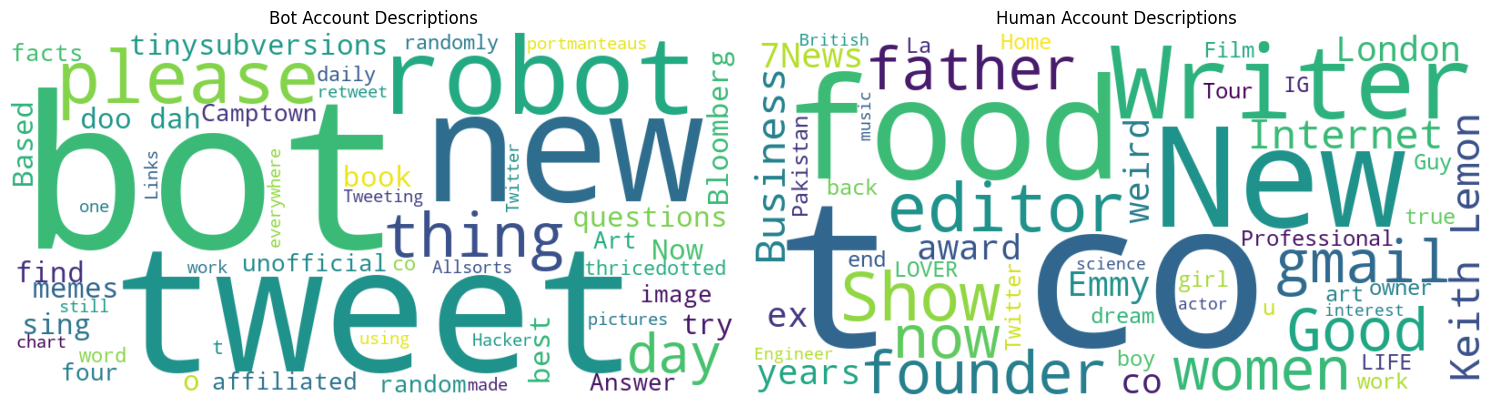

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# Ensure DataFrame is created correctly
df = pd.DataFrame(data)  # Assuming 'data' is your DataFrame
# Convert descriptions to string
df['Twitter_User_Description'] = df['Twitter_User_Description'].astype(str)
# Group descriptions by account and keep only unique ones
unique_descriptions = df.groupby('Twitter_User_Name')['Twitter_User_Description'].unique().apply(lambda x: ' '.join(x))
# Separate bot and human accounts
bot_accounts = df[df['Label'] == 0]['Twitter_User_Name']
human_accounts = df[df['Label'] == 1]['Twitter_User_Name']
# Get descriptions for bot and human accounts
bot_descriptions = unique_descriptions[bot_accounts].drop_duplicates()
human_descriptions = unique_descriptions[human_accounts].drop_duplicates()
# Convert descriptions to text for word cloud generation
bot_text = " ".join(bot_descriptions)
human_text = " ".join(human_descriptions)
# Create custom stopwords (optional)
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['https', 'http', 'www', 'com'])
# Generate word clouds
bot_wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=custom_stopwords, 
    max_words=50
).generate(bot_text)
human_wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=custom_stopwords, 
    max_words=50
).generate(human_text)
# Plot word clouds
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(bot_wordcloud, interpolation='bilinear')
plt.title('Bot Account Descriptions')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(human_wordcloud, interpolation='bilinear')
plt.title('Human Account Descriptions')
plt.axis('off')
plt.tight_layout()
plt.show()

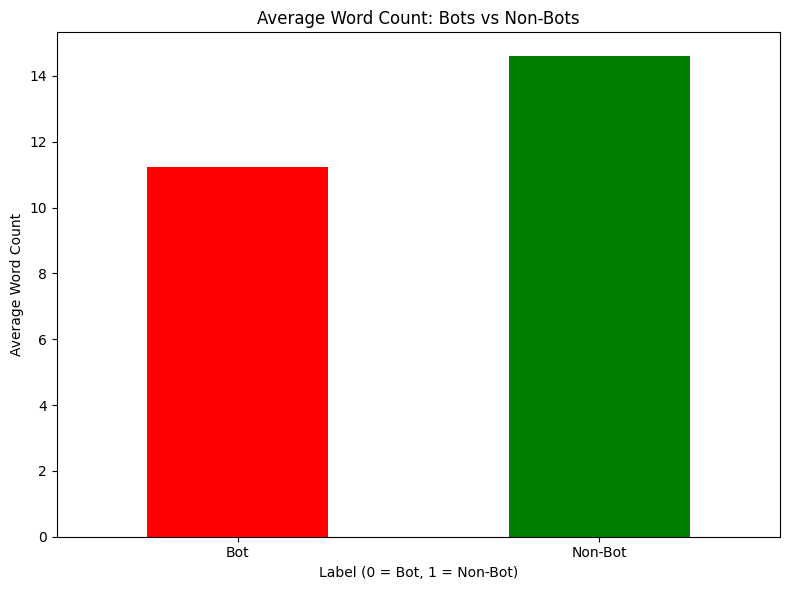

In [16]:
# Group the data by 'Label' (bot vs non-bot) and calculate the average word count
average_word_count = data.groupby('Label')['Word_Count'].mean()

# Plot the result using a bar chart
plt.figure(figsize=(8, 6))
average_word_count.plot(kind='bar', color=['red', 'green'])

# Customize the plot
plt.title('Average Word Count: Bots vs Non-Bots')
plt.xlabel('Label (0 = Bot, 1 = Non-Bot)')
plt.ylabel('Average Word Count')
plt.xticks([0, 1], ['Bot', 'Non-Bot'], rotation=0)
plt.tight_layout()

# Show the plot
plt.show()
